# 2.1 urlib的使用

## 首先介绍一个Python库,叫作urlib,利用它就可以实现 HTTP请求的发送,而且不需要关心HTTP协议本身甚至更底层的实现，我们要做的是指定请求的URL、请求头、请求体等信息。此外urllib 还可以把服务器返回的响应转化为Python对象，我们通过该对象便可以方便地获取响应的相关信息，如响应状态码、响应头、响应体等。

<b>注意:</b> 在Python2中，有urllib和urllib2两个库来实现HTTP请求的发送。而在Python3中，urllib2库已经不存在了，统一为了 urllib。<br>

urllib库的使用方法，它是Python内置的 HTTP请求库，也就是说不需要额外安装，可直接使用。urllib库包含如下4个模块。<br>

<b>1.request</b>:这是最基本的HTTP请求模块，可以模拟请求的发送。就像在浏览器里输入网址然后按下回车一样，只需要给库方法传入URL以及额外的参数，就可以模拟实现发送请求的过程了。<br>

<b>2.error:</b>异常处理模块。如果出现请求异常，那么我们可以捕获这些异常，然后进行重试或其他操作以保证程序运行不会意外终止。<br>

<b>3.parse:</b>一个工具模块。提供了许多 URL的处理方法，例如拆分、解析、合并等。口robotparser:主要用来识别网站的robots.tx! 文件，然后判断哪些网站可以爬，哪些网站不可以，它其实用得比较少。<br>

<b>4.robotparser:主要用来识别网站的robots.tx!文件，然后判断哪些网站可以爬，哪些网站不可以，它其实用得比较少。<br>




### 1.发送请求 request

#### <b>urlopen</b>

urllib.request 模块提供了最基本的构造 HTTP请求的方法，利用这个模块可以模拟浏览器的请求发起过程，同时它还具有处理授权验证(Authentication)、重定向(Redirection)、浏览器Cookie以及其他一些功能。



In [ ]:
import urllib.request
response = urllib.request.urlopen('https://www.python.org')
print(response.read().decode('utf-8'))

响应到底是什么。利用type方法输出响应的类型:



In [ ]:
import urllib.request
response = urllib.request.urlopen('https://www.python.org')
print(type(response))

<class 'http.client.HTTPResponse'>


输出结果如下:

<b> <class "http.client.HTTPResponse'> </b>

响应是一个HTTPResposne类型的对象，主要包含<b>read</b>、<b>readinto</b>、<b>getheader</b>、<b>getheaders</b>、<b>fileno</b>等方法，以及<b>msg</b>、<b>version</b>,<b>status</b>、<b>reason</b>、<b>debuglevel</b>、<b>closed</b> 等属性。得到响应之后，我们把它赋值给<b>response</b>变量，然后就可以调用上述那些方法和属性，得到返回结果的一系列信息了

In [ ]:
import urllib.request
response = urllib.request.urlopen('https://www.python.org')
print(response.status)
print(response.getheaders())
print(response.getheader('Server' ))

200
[('Connection', 'close'), ('Content-Length', '50819'), ('x-frame-options', 'SAMEORIGIN'), ('via', '1.1 varnish, 1.1 varnish, 1.1 varnish'), ('content-type', 'text/html; charset=utf-8'), ('Accept-Ranges', 'bytes'), ('Date', 'Mon, 21 Apr 2025 02:42:46 GMT'), ('Age', '2517'), ('X-Served-By', 'cache-iad-kiad7000081-IAD, cache-iad-kiad7000081-IAD, cache-sin-wsss1830077-SIN'), ('X-Cache', 'MISS, HIT, HIT'), ('X-Cache-Hits', '0, 2, 153'), ('X-Timer', 'S1745203366.432028,VS0,VE0'), ('Vary', 'Cookie'), ('Strict-Transport-Security', 'max-age=63072000; includeSubDomains; preload')]
None


#### <b>data参数</b>

data参数是可选的。在添加该参数时,需要使用<b>bytes</b>方法将参数转化为字节流编码格式的内容即 <b>bytes</b> 类型。另外，如果传递了这个参数，那么它的请求方式就不再是GET，而是POST了。

In [ ]:
import urllib.parse
import urllib.request
'''
这里我们传递了一个参数name，值是germey,需要将它转码成bytes类型。转码时采用了bytes 方法该方法的
第一个参数得是str(字符串)类型，因此用 urllib.parse 模块里的 urlencode 方法将字典参数转化为字符串;
第二个参数用于指定编码格式，这里指定为utf-8。
'''
data = bytes(urllib.parse.urlencode({'name': 'germey'}), encoding='utf-8')
responses = urllib.request.urlopen('https://www.httpbin.org/post', data=data)
print(responses.read().decode('utf-8'))

#### <b>timeout参数</b>

timeout 参数用于设置超时时间，单位为秒，意思是如果请求超出了设置的这个时间，还没有得到响应，就会抛出异常。如果不指定该参数，则会使用全局默认时间。这个参数支持HTTP、HTTPS、FTP请求。

In [31]:
import urllib.request
response = urllib.request.urlopen("https://www.httpbin.org/get", timeout=0.1)
print(response.read())

URLError: <urlopen error timed out>

In [ ]:
import socket
import urllib.request
import urllib.error
try:
    response = urllib.request.urlopen("https://www,httpbin.org/get", timeout = 0.1)
except urllib.error.URLError as e:
    if isinstance(e.reason, socket.timeout):
        print('TIME OUT')

#### <b>其他参数</b>

除了data参数和timeout 参数,urlopen方法还有context参数,该参数必须是ssl.SSLContext类型，用来指定 SSL的设置。
此外，cafile和capath这两个参数分别用来指定CA证书和其路径，这两个在请求 HTTPS 链接时会有用。
cadefault参数现在已经弃用了，其默认值为False。
至此，我们讲解了 urlopen 方法的用法，通过这个最基本的方法，就可以完成简单的请求和网页抓取。

#### <b>request</b>

利用 urlopen方法可以发起最基本的请求,但它那几个简单的参数并不足以构建一个完整的请求。
如果需要往请求中加人Headers 等信息，就得利用更强大的Request 类来构建请求了。

<b>class urllib.request.Request(url, data=None, headers={},origin_req_host = None, unverifiable=false, method=None)</b>

<b>url</b> 用于请求 URL，这是必传参数，其他的都是可选参数。

<b>data</b> 如果要传数据，必须传bytes 类型的。如果数据是字典，可以先用urllib.parse模块里的 urlencode 方法进行编码。

<b>headers</b> 是一个字典，这就是请求头，我们在构造请求时，既可以通过 headers 参数直接构造此项，也可以通过调用请求实例的add header方法添加。

添加请求头最常见的方法就是通过修改User-Agent来伪装测览器。默认的User-gent是Python-urllib,我们可以通过修改这个值来伪装浏览器。例如要伪装火狐测览器,就可以把User-Agent设置为:

Mozil1a/5.0(Xii;u; Linux i686)Gecko/20073127 firefox/2.0.0.11

<b>origin_req_host</b> 指的是请求方的host 名称或者IP地址。

<b>unverifiable</b> 表示请求是否是无法验证的，默认取值是False，意思是用户没有足够的权限来接收这个请求的结果。例如,请求一个HTML文档中的图片,但是没有自动抓取图像的权限，这时 unverifiable 的值就是True。

<b>method</b> 是一个字符串，用来指示请求使用的方法，例如GET、POST和PUT等

In [ ]:
import urllib.request
request = urllib.request.Request('https://python.org')
response = urllib.request.urlopen(request)
print(response.read().decode('utf 8'))

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <script defer data-domain="python.org" src="https://analytics.python.org/js/script.outbound-links.js"></script>

    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-

In [ ]:
from urllib import request, parse
url ='https://www.httpbin.org/post'
headers = {
    'User-Agent':'Mozi11a/4.0(compatible; MSIE 5.5; Windows NT)',
    'Host': 'www.httpbin.org'
}
dict = {'name': 'germey'}
data = bytes(parse.urlencode(dict), encoding = 'utf-8')
req = request.Request(url=url, data=data, headers=headers, method='POST')
response = request.urlopen(req)
print(response.read().decode('utf-8'))

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "name": "germey"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "11", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "www.httpbin.org", 
    "User-Agent": "Mozi11a/4.0(compatible; MSIE 5.5; Windows NT)", 
    "X-Amzn-Trace-Id": "Root=1-6805aee9-4aa0951a195e456f6dee0ed6"
  }, 
  "json": null, 
  "origin": "23.97.62.116", 
  "url": "https://www.httpbin.org/post"
}



#### <b>高级用法</b>

我们已经可以构建请求了，那么对于一些更高级的操作(例如.Cookie处理、代理设置等)，又该怎么实现呢?

此时需要更强大的工具，于是Handler登场了。简而言之，Handler可以理解为各种处理器，有专门处理登录验证的、处理Cookie的，处理代理设置的。利用这些Handler，我们几乎可以实现 HTTP请求中所有的功能。

首先介绍一下 **urllib.reguest** 模块里的 BaseHandler类，这是其他所有 Handler 类的父类。它提供了最基本的方法，例如defaultopen、protocolrequest等。

会有各种 Handler 子类继承 BaseHandler类，接下来举几个子类的例子如下:

**HTTPDefaultErrorHandler**用于处理 HTTP响应错误，所有错误都会抛出HTTPError 类型的异常

**HTTPRedirectHandler**用于处理重定向。

**HTTPCookieProcessor** 用于处理Cookie

**ProxyHandler**用于设置代理，代理默认为空。

**HTTPPasswordMgr**用于管理密码，它维护着用户名密码的对照表。

**HTTPBasicAuthHandler**用于管理认证，如果一个链接在打开时需要认证，那么可以用这个类来解决认证问题。

关于这些类如何使用，现在先不急着了解，后面会用实例演示。
另一个比较重要的类是OpenerDirector，我们可以称之为Opener。我们之前用过的urlopen方法实际上就是 urllib库为我们提供的一Opener。
那么,为什么要引人Opener呢?因为需要实现更高级的功能。之前使用的Request类和urlopen 类相当于类库已经封装好的极其常用的请求方法，利用这两个类可以完成基本的请求，但是现在我们需要实现更高级的功能，就需要深人一层进行配置，使用更底层的实例来完成操作，所以这里就用到了 Opener.Opener类可以提供open方法，该方法返回的响应类型和urlopen方法如出一辙。那么，opener类和 Handler类有什么关系呢?简而言之就是，利用 Handler 类来构建 opener 类。
下面用几个实例来看看 Handler类和 opener 类的用法

●验证
在访问某些网站时，例如 htps://ssr3.scrape.center，可能会弹出这样的认证窗口，如图 2-2 所示
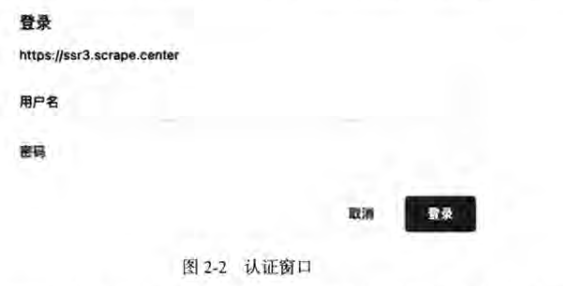

遇到这种情况,就表示这个网站启用了基本身份认证,英文叫作<b>HTTPBasic Access Authentication.</b>这是一种登录验证方式，允许网页浏览器或其他客户端程序在请求网站时提供用户名和口令形式的身份凭证。
那么爬虫如何请求这样的页面呢?借助 <b> HTTPBasicAuthHandler </b> 模块就可以完成，相关代码如下:

这里首先实例化了一个 <b>HTTPBasicAuthHandler</b> 
对象authhandler，其参数是 <b> HTTPPasswordMgrWithDefaultRealm </b> 对象，
它利用 <b> add_password </b> 方法添加用户名和密码，这样就建立了一个用来处理验证的 Handler类。
然后将刚建立的 <b> auth_handler </b> 类当作参数传入 
<b> build_opener </b>方法,构建一个Opener,这个Opener在发送请求时就相当于已经验证成功了。
最后利用 Opener 类中的 open方法打开链接，即可完成验证。这里获取的结果就是验证成功后的页面源码内容。


In [ ]:

from urllib.request import HTTPPasswordMgrWithDefaultRealm, HTTPBasicAuthHandler,build_opener 
from urllib.error import URLError

username = 'admin'
password ='admin'
url= "https://ssr3.scrape.center/"
p = HTTPPasswordMgrWithDefaultRealm()
p.add_password(None, url, username, password)
auth_handler = HTTPBasicAuthHandler(p)
opener = build_opener(auth_handler)
try:
    result= opener.open(url)
    html = result.read().decode('utf-8')
    print(html)
except URLError as e:
    print(e.reason)

<html lang="en">
<head>
  
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width,initial-scale=1">
  <link rel="icon" href="/static/img/favicon.ico">
  <title>Scrape | Movie</title>
  

  <link href="/static/css/app.css" type="text/css" rel="stylesheet">
  
<link href="/static/css/index.css" type="text/css" rel="stylesheet">

</head>
<body>
<div id="app">
  <div data-v-74e8b908="" class="el-row" id="header">
    <div data-v-74e8b908="" class="container el-col el-col-18 el-col-offset-3">
      <div data-v-74e8b908="" class="el-row">
        <div data-v-74e8b908="" class="logo el-col el-col-4">
          <a data-v-74e8b908="" href="/" class="router-link-exact-active router-link-active">
            <img data-v-74e8b908="" src="/static/img/logo.png" class="logo-image">
            <span data-v-74e8b908="" class="logo-title">Scrape</span>
          </a>
        </div>
      </div>
    </div>
  </div>
  
<div dat


#### <b>代理</b>

做爬虫的时候，免不了要使用代理，如果要添加代理，可以这样做:

In [ ]:
from urllib.error import URLError
from urllib.request import ProxyHandler, build_opener
proxy_handler = ProxyHandler({
    'http':'http://127.0.0.1:8080',
    'https':'https://127.0.0.1:8080',
})
opener = build_opener(proxy_handler)
try:
    response=opener.open('https://www.baidu.com')
    print(response.read().decode('utf-8'))
except URLError as e:
    print(e.reason)

[Errno 111] Connection refused


#### <b>Cookie</b>

处理 Cookie 需要用到相关的 Handler。我们先用实例来看看怎样获取网站的Cookie，相关代码如下:

In [ ]:
import http.cookiejar, urllib.request
cookie = http.cookiejar.CookieJar()
handler = urllib.request.HTTPCookieProcessor(cookie)
opener = urllib.request.build_opener(handler)
response = opener.open('https://www.baidu.com')
for item in cookie:
    print(item.name +"="+ item.value)

#首先，必须声明一个Cookie]ar对象。然后需要利用HTTPCookieProcessor构建一个Handler，最后利用 build opener方法构建 Opener，执行 open 函数即可。


BAIDUID=1C5A9A40AFB1AB4F99530803BB393490:FG=1
BIDUPSID=1C5A9A40AFB1AB4F817659B3DFEACAB3
PSTM=1745205504


既然能输出，那么可不可以输出文件格式的内容呢?我们知道Cookie 实际上也是以文本形式保存的。因此答案当然是肯定的，这里通过下面的实例来看看:

In [30]:

import urllib.request, http.cookiejar
filename = 'cookie.txt'
cookie = http.cookiejar.MozillaCookieJar(filename)
handler = urllib.request.HTTPCookieProcessor(cookie)
opener = urllib.request.build_opener(handler)
response = opener.open("https://www.baidu.com")
cookie.save(ignore_discard=True, ignore_expires=True)


这时需要将Cookiejar 换成 MozillaCookiejar，它会在生成文件时用到，是 Cookiejar 的子类,可以用来处理跟 Cookie和文件相关的事件,例如读取和保存Cookie，可以将Cookie保存成Mozilla型浏览器的 Cookie 格式。
运行上面的实例之后，会发现生成了一个cookie.txt文件，该文件内容如下:

